[[ 0.6598749  -0.52473526]
 [-0.52473526  0.78907535]]
0.7890753468665503


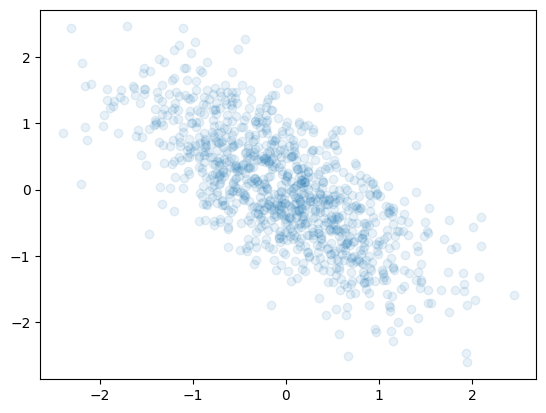

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

def sample_full_covariance(dim: int, rng: np.random.Generator) -> np.ndarray:
    L = np.zeros((dim, dim))
    L[0, 0] = 1.0
    for k in range(1, dim):
        alpha = 2.0 - 1.0 + (dim - k) / 2.0
        y = rng.beta(k / 2.0, alpha)
        u = rng.normal(size=k)
        u /= np.linalg.norm(u)
        w = np.sqrt(y) * u
        L[k, :k] = w
        L[k, k] = np.sqrt(1.0 - y)
    stds = rng.uniform(0.8, 1.2, size=dim)
    return np.diag(stds) @ L @ L.T @ np.diag(stds)

cov = sample_full_covariance(2, rng)
print(cov)
print(cov[1, 1])

plt.scatter(*rng.multivariate_normal(mean=np.zeros(2), cov=cov, size=1000).T, alpha=0.1)
plt.show()

Rejected tests (0/25):

Not rejected tests (25/25):
kolmogorov_smirnov
kuiper
cramer_von_mises
anderson_darling
watson
zhang_kolmogorov_smirnov
zhang_cramer_von_mises
zhang_anderson_darling
greenwood
quesenberry_miller
pearson
sukhatme
neyman_first_order
neyman_second_order
neyman_third_order
neyman_fourth_order
sherman
kimball
cheng_spiring
hegazy_green_absolute
hegazy_green_modified_absolute
hegazy_green_quadratic
hegazy_green_modified_quadratic
yang
frozini


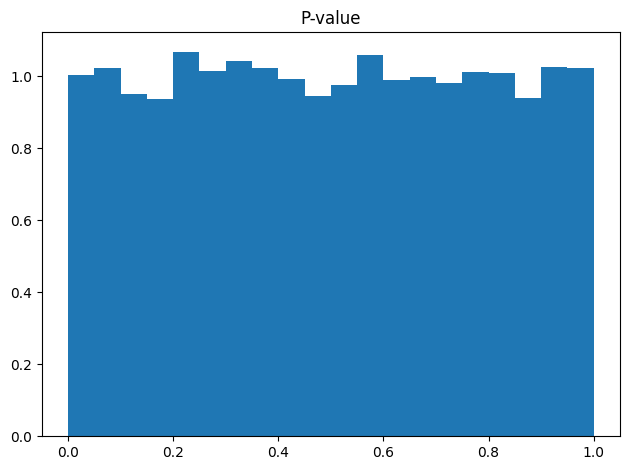

Coverage: 0.90


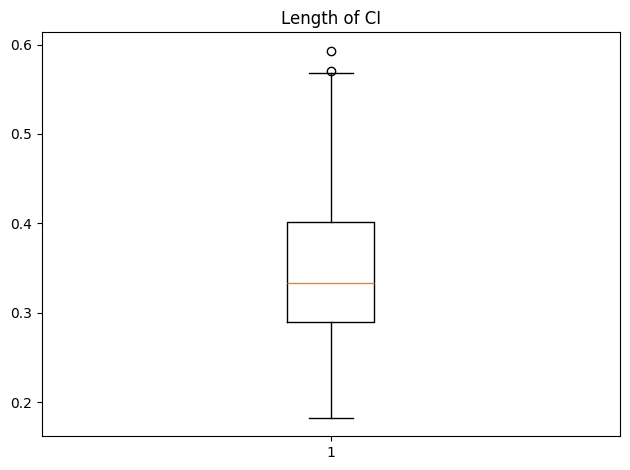

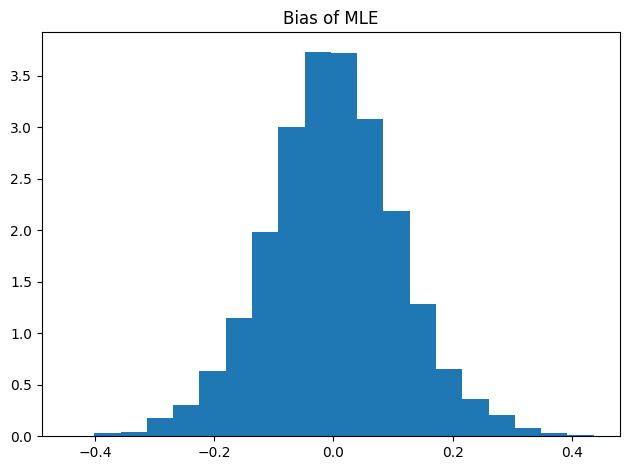

In [12]:
import polars as pl
import matplotlib.pyplot as plt
from sicore import uniformity_test

frame = pl.read_csv("results/*.csv")
print(uniformity_test(frame["p"].to_numpy()))

plt.hist(frame["p"], bins=20, density=True)
plt.title("P-value")
plt.show()

print(f"Coverage: {frame["is_contain"].mean():.2f}")
plt.boxplot(frame["ci_upper"] - frame["ci_lower"])
plt.title("Length of CI")
plt.show()

plt.hist(frame["mle"] - frame["true_signal"], bins=20, density=True)
plt.title("Bias of MLE")
plt.show()